# DAT 203 - Lab Assignment #8

- Author: Colin Bowers
- Date: July 8, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

## Data Preparation

**1 - Import the dataset and run a complete analysis of it. Your target is column name “gnd”**

In [2]:
df = pd.read_csv("data/Data.csv")
df.shape

(800, 258)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 258 entries, Unnamed: 0 to gnd
dtypes: float64(256), int64(2)
memory usage: 1.6 MB


In [4]:
df.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
0,1,-1.000000,-0.999977,-0.998420,-0.969256,-0.774192,-0.275283,0.034194,-0.399883,-0.815319,...,0.427150,0.404087,0.213519,-0.104366,-0.444652,-0.740973,-0.931514,-0.992336,-0.99966,0
1,2,-1.000000,-0.999998,-0.999760,-0.992020,-0.901515,-0.545999,0.030940,0.411866,0.390567,...,0.358344,0.374951,-0.040142,-0.586220,-0.911391,-0.993541,-0.999839,-0.999998,-1.00000,0
2,3,-0.999999,-0.999970,-0.999545,-0.995613,-0.961828,-0.717215,-0.144694,0.092191,-0.260683,...,0.414912,0.334299,-0.060454,-0.541605,-0.867137,-0.981191,-0.999056,-0.999990,-1.00000,0
3,4,-1.000000,-1.000000,-0.999878,-0.989419,-0.832602,-0.368054,-0.080497,-0.246663,-0.263954,...,0.480128,0.487418,0.356270,-0.015310,-0.530088,-0.893466,-0.993412,-0.999916,-1.00000,0
4,5,-1.000000,-1.000000,-0.999999,-0.999821,-0.988678,-0.829627,-0.330878,0.013998,-0.345315,...,0.080920,0.086649,-0.458626,-0.885111,-0.993165,-0.999919,-1.000000,-1.000000,-1.00000,0


In [5]:
df.tail()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
795,796,-0.995310,-0.956031,-0.846924,-0.681021,-0.434111,-0.180687,0.091731,0.214409,0.234857,...,0.338125,0.426184,0.321398,0.129289,-0.212138,-0.601319,-0.881206,-0.983232,-0.999032,3
796,797,-0.880953,-0.542869,-0.124772,0.311506,0.489262,0.514072,0.489566,0.363748,0.071012,...,-0.208781,-0.457530,-0.619508,-0.793340,-0.925092,-0.978657,-0.995132,-0.999427,-0.999974,3
797,798,-0.999923,-0.993838,-0.903458,-0.623514,-0.320930,-0.082592,0.101512,0.225267,0.338895,...,0.330384,0.033271,-0.325989,-0.601545,-0.814848,-0.948654,-0.992387,-0.999264,-0.999967,3
798,799,-0.999673,-0.994864,-0.971053,-0.914876,-0.776873,-0.471125,-0.177047,-0.009435,0.184333,...,0.016146,-0.395286,-0.710272,-0.897939,-0.977027,-0.997100,-0.999848,-0.999997,-1.000000,3
799,800,-0.999978,-0.998045,-0.962207,-0.756311,-0.329637,0.007281,0.203088,0.284727,0.247870,...,0.311372,0.423458,0.402360,0.188280,-0.225291,-0.622153,-0.892301,-0.986707,-0.999380,3


In [6]:
# The first column, which is unnamed, appears to be a row index (i.e. count).  Let's drop it since it should not be considered a feature.
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# how does the distribution of our labels look?
df.gnd.value_counts()

0    200
1    200
2    200
3    200
Name: gnd, dtype: int64

In [8]:
# do we have any missing values?
df.isnull().sum().sum()

0

In [29]:
df.describe().round(2)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,...,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,-0.99,-0.97,-0.92,-0.82,-0.68,-0.50,-0.27,-0.08,-0.15,-0.42,...,-0.11,-0.14,-0.37,-0.60,-0.74,-0.84,-0.90,-0.95,-0.98,1.50
std,0.05,0.12,0.21,0.31,0.41,0.47,0.45,0.42,0.43,0.44,...,0.47,0.48,0.46,0.42,0.35,0.29,0.23,0.17,0.09,1.12
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
25%,-1.00,-1.00,-1.00,-1.00,-0.99,-0.93,-0.65,-0.28,-0.43,-0.81,...,-0.37,-0.50,-0.77,-0.96,-1.00,-1.00,-1.00,-1.00,-1.00,0.75
50%,-1.00,-1.00,-1.00,-0.98,-0.89,-0.64,-0.27,0.02,-0.08,-0.54,...,0.01,-0.01,-0.41,-0.75,-0.92,-0.98,-1.00,-1.00,-1.00,1.50
75%,-1.00,-1.00,-0.95,-0.76,-0.45,-0.08,0.13,0.23,0.18,-0.05,...,0.26,0.23,0.02,-0.32,-0.61,-0.82,-0.94,-0.99,-1.00,2.25
max,-0.34,0.11,0.37,0.47,0.52,0.53,0.53,0.53,0.53,0.53,...,0.53,0.53,0.53,0.53,0.49,0.51,0.47,0.17,-0.23,3.00


## Feature Selection 

**2 - Split the data into training and testing**

In [10]:
target = "gnd"
predictors = list(df.columns)
predictors.remove(target)
len(predictors)

256

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
train, test = train_test_split(df, test_size=0.2)

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]
y_test = test[target]


**3 - Apply any feature selection algorithm and choose the best features.**

In [13]:
%%time
from sklearn.feature_selection import RFE

rfe_model = DecisionTreeClassifier(random_state=0)
rfe = RFE(rfe_model)
rfe.fit(X_train, y_train)
score = rfe.score(X_test, y_test)
count = rfe.n_features_

print(f"Optimal number of features: {count}")
print(f"Accuracy: {score}")
print("-----------------------")

Optimal number of features: 128
Accuracy: 0.9625
-----------------------
CPU times: user 7.35 s, sys: 0 ns, total: 7.35 s
Wall time: 7.34 s


In [14]:
before = len(X_train.columns)
X_train = X_train.loc[:, rfe.get_support()]
X_test = X_test.loc[:, rfe.get_support()]
after = len(X_train.columns)

c = after - before
print(f"Removed {c} columns from training data leaving a total of {len(X_train.columns)}")

Removed -128 columns from training data leaving a total of 128


## Train a model

**4 - Use any classifier and report the accuracy**

In [15]:
model = DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9625

In [16]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.96      1.00      0.98        48
           2       0.93      0.93      0.93        28
           3       0.97      0.93      0.95        42

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



In [17]:
mat = metrics.confusion_matrix(y_pred, y_test)
print(mat)

[[41  0  1  0]
 [ 1 48  0  1]
 [ 0  0 26  2]
 [ 0  0  1 39]]


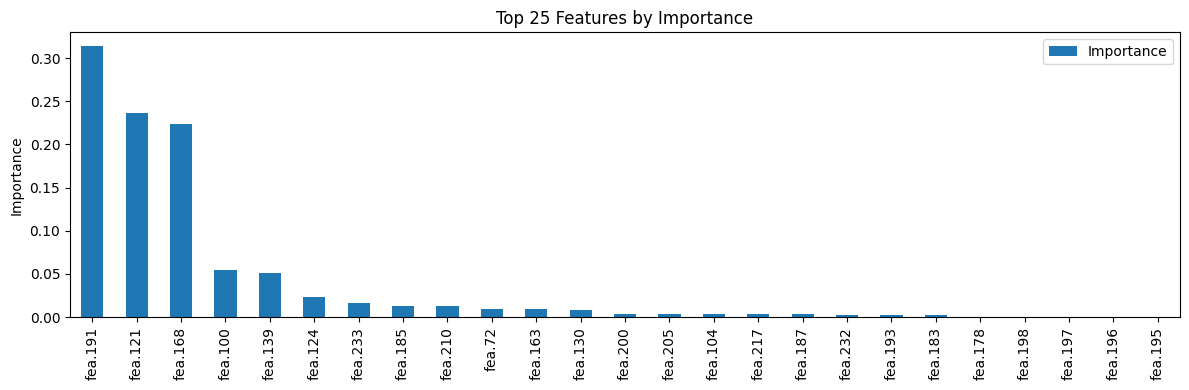

In [18]:
#imp = model.feature_importances_
imp_df = pd.DataFrame(
    model.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.iloc[0:25].plot(kind='bar', figsize=(12, 4))
plt.ylabel("Importance")
plt.title("Top 25 Features by Importance")
plt.tight_layout()
plt.show()

## PCA Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

**5 - Apply PCA dimensionality reduction technique to the original data.**

In [20]:
%%time

df2 = df.drop("gnd", axis=1)

pca = PCA()
data_pca = pca.fit_transform(df2)
data_pca = pd.DataFrame(data_pca)
data_pca["gnd"] = df["gnd"]
print("-----------------------")

-----------------------
CPU times: user 2min 5s, sys: 2min 41s, total: 4min 46s
Wall time: 37.2 s


In [21]:
data_pca.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,gnd
107,5.690884,0.618226,-2.882484,0.678727,3.114311,-0.657124,-1.195379,-0.285795,1.394101,0.523593,...,-0.000993,0.000739,-0.001639,0.000654,-0.000465,0.000497,-0.000131,-3.476307e-07,1.804866e-07,0
378,-6.821930,1.127351,-1.979340,-0.029238,-0.316229,-0.576053,0.011796,0.079280,0.031760,0.639131,...,-0.000136,0.000308,0.000090,0.000401,0.000454,0.000021,0.000123,-1.351177e-08,5.085555e-08,1
568,-1.805510,1.574153,3.592532,-3.123580,-0.353248,-0.925323,1.992156,-2.260312,0.973623,-0.559709,...,-0.002477,-0.000848,-0.000899,-0.000411,-0.000257,-0.000924,-0.000067,-7.754496e-08,4.293881e-08,2
111,4.743801,-0.189653,-0.158980,2.986285,3.750373,-0.997299,-1.382655,-0.481245,0.563191,0.420003,...,-0.000223,-0.000012,-0.000098,-0.000391,-0.000484,-0.000227,0.000113,2.551083e-08,1.607957e-07,0
571,0.364486,4.693550,3.462347,-0.953485,2.952829,3.523604,4.018823,-0.305791,4.600134,-0.427762,...,-0.002660,-0.000629,-0.001503,-0.000664,-0.001236,-0.000064,-0.000433,8.309696e-08,4.054390e-08,2


**6 - Plot a 2-dimensional representation of the data based on the first and second principal components, explain the results versus the known classes (display each class with a different color).**

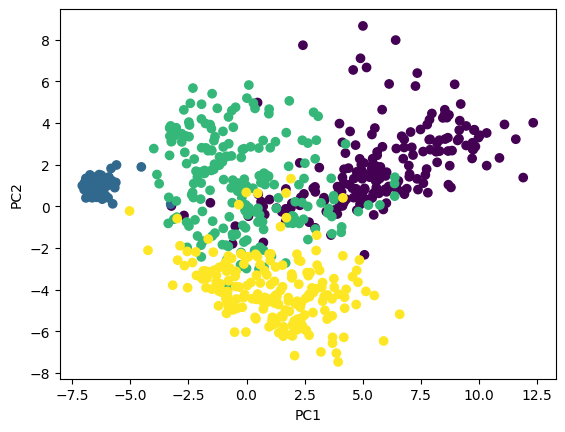

In [22]:
plt.scatter(data_pca[0], data_pca[1], c=data_pca["gnd"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Comments:**
> //TODO


**7 - Repeat step 6 for the 20th and 21st components and comment on the result**

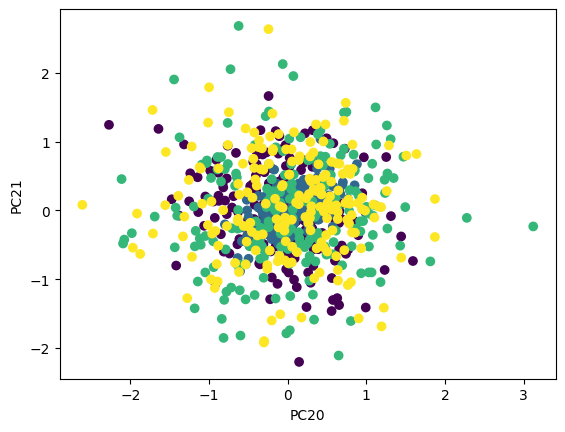

In [23]:
plt.scatter(data_pca[19], data_pca[20], c=data_pca["gnd"])
plt.xlabel("PC20")
plt.ylabel("PC21")
plt.show()

**Comments:**
- Much less distinct.  Not much information retained at this level to predict our target.


## t-SNE

**8 - Plot a 2-dimensional representation of the original data using t-SNE, compare the output with PCA’s output in Step 6 and 7, and explain the results versus the known classes.**

In [24]:
%%time
from sklearn.manifold import TSNE

df3 = df.drop("gnd", axis=1)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df3)
df_tsne = pd.DataFrame(tsne_results)
df_tsne["gnd"] = df["gnd"]
print("-----------------------")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.012s...
[t-SNE] Computed neighbors for 800 samples in 0.650s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 1.782573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.392914
[t-SNE] KL divergence after 300 iterations: 0.764181
-----------------------
CPU times: user 1min 11s, sys: 8.25 s, total: 1min 20s
Wall time: 12.6 s


In [25]:
df_tsne.sample(5)

,0,1,gnd
183,11.767301,3.433294,0
588,2.940800,5.977210,2
552,-3.791761,3.340957,2
98,5.489394,-0.533127,0
206,-8.543268,-1.199997,1


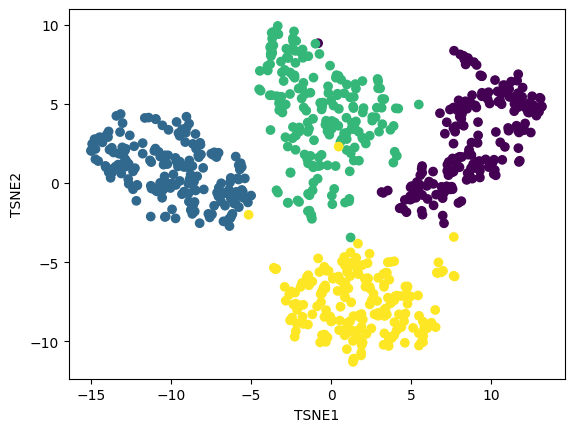

In [26]:
plt.scatter(df_tsne[0], df_tsne[1], c=df_tsne["gnd"])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

**Comments:**

> //TODO

## Dimentionality Comparison

**9 - Use the any classifier to classify 6 sets of dimensionality reduced data (using 2, 4, 10, 30, 40, 256 PCA components).**

In [27]:
%%time

#loop = [2, 4, 10]
#loop = [2, 4, 10, 30, 40, 50, 75, 100, 150, 200, 256]
loop = [2, 4, 10, 30, 40, 256]
results = [ ]

df2 = df.drop("gnd", axis=1)

for n in loop:

    p = PCA(n_components = n)
    p.fit(df2)
    df_p = p.transform(df2)
    df_p = pd.DataFrame(df_p)
    
    df_p["gnd"] = df["gnd"]

    train_p, test_p = train_test_split(df_p, test_size=0.2)

    X_train_p = train_p.iloc[:, 0:n]
    y_train_p = train_p["gnd"]

    X_test_p = test_p.iloc[:, 0:n]
    y_test_p = test_p["gnd"]

    m = DecisionTreeClassifier(random_state=0)
    m = model.fit(X_train_p, y_train_p)
    score = m.score(X_test_p, y_test_p)
    results.append(score)
    
    print(f"For n={n}: {len(df_p.columns)} columns, accuracy is {score}")

print("Done.")
#print(results)
print("-----------------------")

For n=2: 3 columns, accuracy is 0.8375
For n=4: 5 columns, accuracy is 0.95
For n=10: 11 columns, accuracy is 0.95
For n=30: 31 columns, accuracy is 0.9
For n=40: 41 columns, accuracy is 0.95
For n=256: 257 columns, accuracy is 0.925
Done.


**10 - Plot the classification error for the 6 sets and the number of chosen components.**

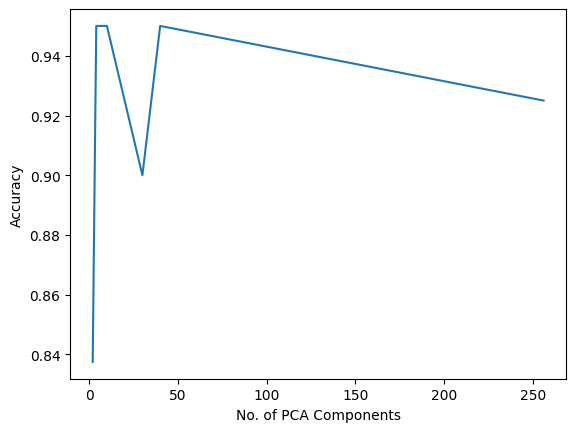

In [28]:
plt.plot(loop, results, "-")
plt.xlabel("No. of PCA Components")
plt.ylabel("Accuracy")
plt.show()